## 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio


   <span style="color:darkgreen">_Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente._</span>

   <span style="color:darkgreen">_Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados._</span>

## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:darkgreen">Abaixo estão as variáveis disponibilizadas, e neste conjunto está incluso a variável resposta, que á *`RENDA`*.</span>


### Dicionário de dados

<span style="color:darkgreen">Abaixo as variáveis, suas devidas descrições e tipos.</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência (de Jan/2015 até Mar/2016)      | Object|
| id_cliente              |  Identificação do Cliente                           | Int64|
| sexo                    |  M = Masculino / F= Feminino                        | Object|
| posse_de_veiculo        |  Y = Possui / N = Não possui                        | Bool|
| posse_de_imovel         |  Y = Possui / N = Não possui                        | Bool|
| qtd_filhos              |  Quantidade de filhos dos clientes                  | Int64|
| tipo_renda              |  Tipo da renda (Ex: Assalariado, Pensionista)       | Object|
| educacao                |  Nivel de escolaridade (Ex: Graduado, Mestrado)     | Object|
| estado_civil            |  Estado civil do cliente (Ex: Casado, Solteiro)     | Object|
| tipo_residencia         |  Tipo de residência do cliente (Ex: Casa, Aluguel)  | Object|
| idade                   |  Idade em anos do cliente                           | Int64|
| tempo_emprego           |  Tempo do emprego do cliente em anos                | Float64|
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente     | Float64|
| renda                   |  ESCREVER AQUI                                      | Float64|
| Unnamed                 |  Renda do cliente em BRL R$                         | Int64|





#### Carregando os pacotes
<span style="color:darkgreen">É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.</span>

In [26]:
!pip install ipywidgets

In [27]:
import ipywidgets as widgtes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

#### Carregando os dados
<span style="color:darkgreen">O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.</span>

<span style="color:darkgreen">Vamos importar o arquivo CSV e entender qual é o seu tamanho, para definir a melhor estratégia para o projeto.</span>


In [2]:
# Importando o arquivo CSV.
renda = pd.read_csv('./input/previsao_de_renda.csv')

# Verificando o tamanho das linhas e colunas do arquivo, respectivamente.
renda.shape

(15000, 15)

In [3]:
# Visualização de uma parte do DataFrame.
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [4]:
# Lista das variáveis, quantidades e o tipo de cada.
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
# Vamos excluir as linhas duplicadas.
renda.drop_duplicates()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


#### Entendimento dos dados - Univariada
<span style="color:darkgreen">Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. </span>

In [6]:
# Nesta passo vamos gerar o Profile Report do objeto de estudo.
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Importando o Profile Report para arquivo .html
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:darkgreen"> Entendimento das variáveis:</span>


In [8]:
renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15000.0,7499.500000,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
id_cliente,15000.0,8304.871400,4797.780446,1.000000,4181.000000,8297.000000,12403.000000,16649.000000
qtd_filhos,15000.0,0.432333,0.746631,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.882333,11.273155,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12427.0,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849
qt_pessoas_residencia,15000.0,2.206400,0.909792,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,5697.287057,8266.816289,118.710000,2026.110000,3499.720000,6392.167500,245141.670000


### Entendimento dos dados - Bivariadas




In [9]:
# Matriz de correlação das variáveis.
matriz = renda.corr() 
print("Correlation Matrix is : ") 
print(matriz) 


Correlation Matrix is : 
                       Unnamed: 0  id_cliente  posse_de_veiculo  \
Unnamed: 0               1.000000    0.016565         -0.003302   
id_cliente               0.016565    1.000000         -0.012072   
posse_de_veiculo        -0.003302   -0.012072          1.000000   
posse_de_imovel         -0.000299   -0.102863         -0.014172   
qtd_filhos              -0.002281    0.030296          0.118690   
idade                   -0.001438   -0.057812         -0.178903   
tempo_emprego            0.004102   -0.036373         -0.076155   
qt_pessoas_residencia   -0.003191    0.037951          0.167240   
renda                    0.004901   -0.009129          0.100493   

                       posse_de_imovel  qtd_filhos     idade  tempo_emprego  \
Unnamed: 0                   -0.000299   -0.002281 -0.001438       0.004102   
id_cliente                   -0.102863    0.030296 -0.057812      -0.036373   
posse_de_veiculo             -0.014172    0.118690 -0.178903      -

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\3673904605.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = renda.corr()


   <span style="color:darkgreen">_Chegamos a conclusão de que a variável que apresenta a maior correlação com a variável *`renda`*, é a variável *`tempo_emprego`*, com 38,5%. Além dela, a única que apresenta um percentual de correlação é a posse de veículo, mas são míseros 10%._</span>


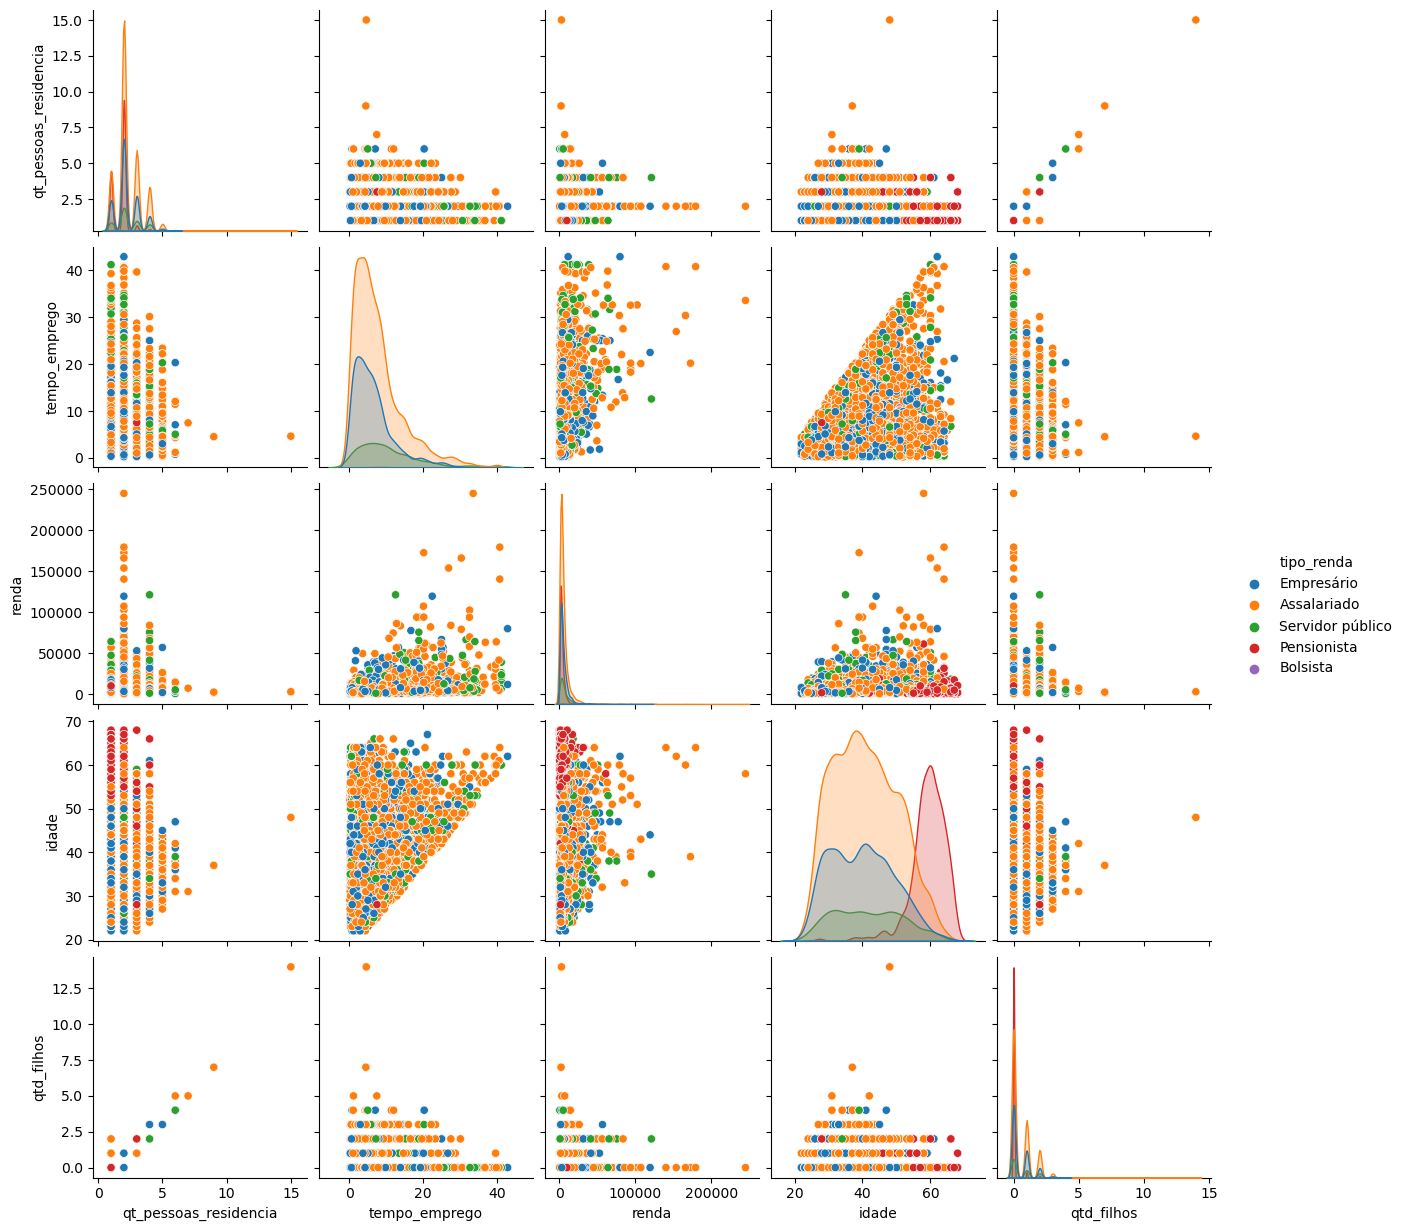

In [10]:
# Scatterplot
sns.color_palette("flare")
sns.pairplot(data=renda,
            hue='tipo_renda',
            vars=['qt_pessoas_residencia',
                  'tempo_emprego',
                 'renda',
                 'idade',
                 'qtd_filhos'],)
plt.show()

<span style="color:darkgreen">_Com o pairplot verificamos de maneira ilustrada o que a matriz de correlação nos mostra com dados, em relação a variável *`renda`*, a melhor variável para se trabalhar em conjunto é a *`tempo_emprego`*, além disso podemos verificar alguns outliers quase em todos os gráficos._</span>

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\1767488738.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(renda.corr(), z_score=0, cmap="vlag", center=0)


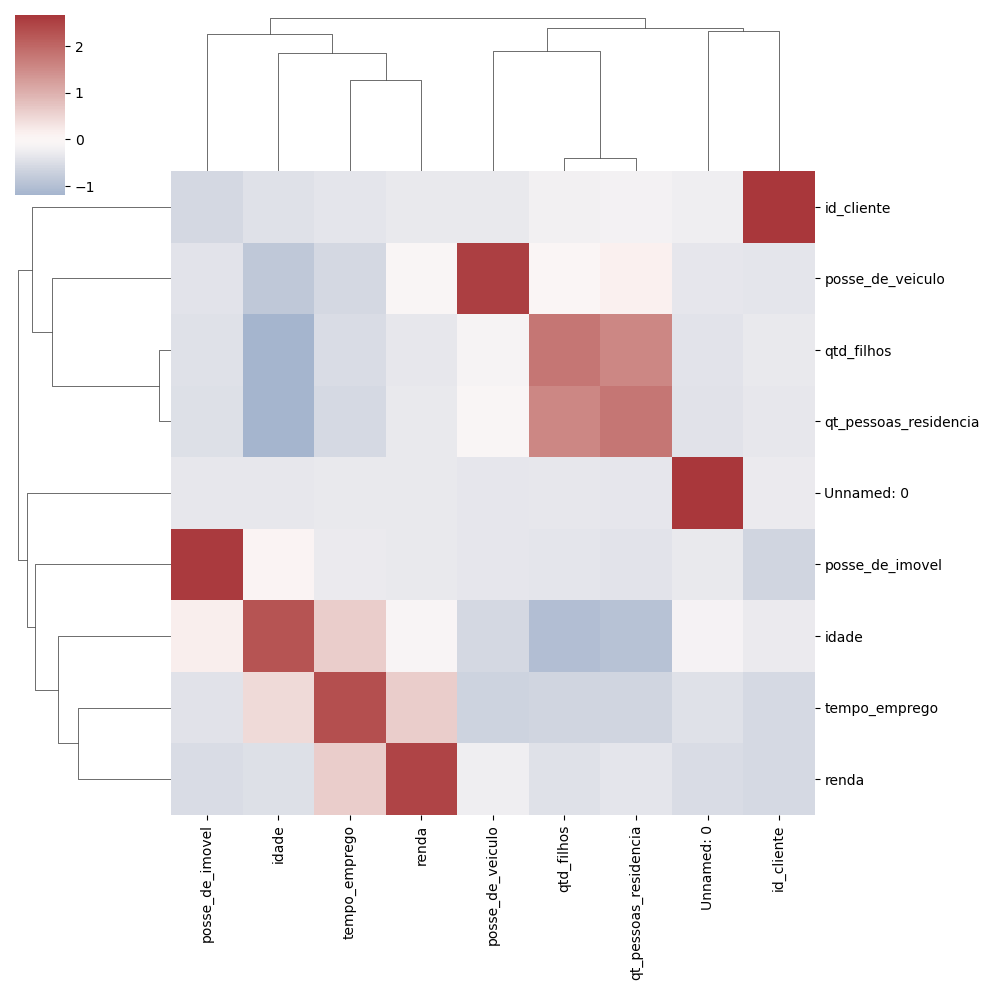

In [11]:
# Clustermap
sns.clustermap(renda.corr(), z_score=0, cmap="vlag", center=0)


<span style="color:darkgreen">_Com o clustermap não é diferente, verificamos o mesmo cenário, e nele podemos incluir mais algumas variáveis que podemos trabalhar, que são as:*`tempo_emprego`* e *`idade`*._</span>

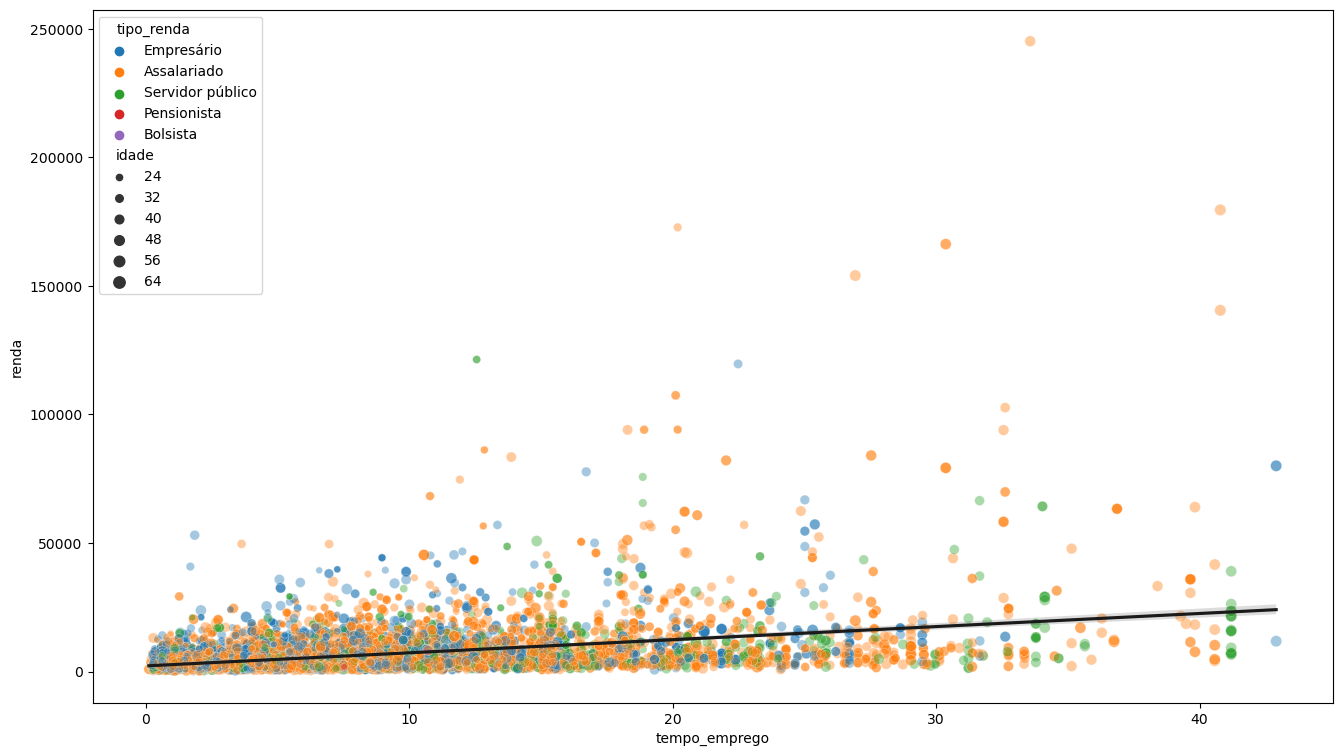

In [12]:
# Linha de tendência
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=renda,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda, 
            scatter=False, 
            color='.10')

plt.show()

<span style="color:darkgreen">_Verificamos que, por mais que as variáveis tenham apenas *38,5% de correlação*, é visivel que elas são correlatas e conseguimos fazer a análise._</span>

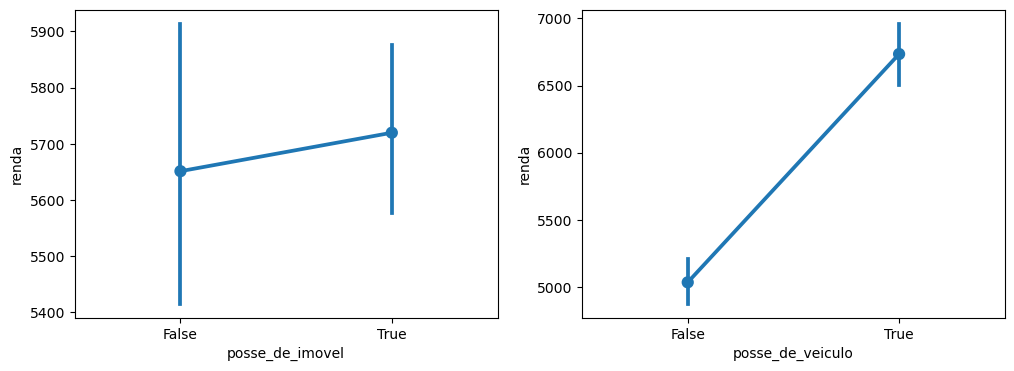

In [13]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

<span style="color:darkgreen">_Ao comparar os gráficos acima, nota-se que a variável `posse_de_veículo` apresenta maior relevância na predição de renda, evidenciada pela maior distância entre os intervalos de confiança para aqueles que possuem e não possuem veículo, ao contrário da variável `posse_de_imóvel`que não apresenta diferença significativa entre as possíveis condições de posse imobiliária._</span>

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


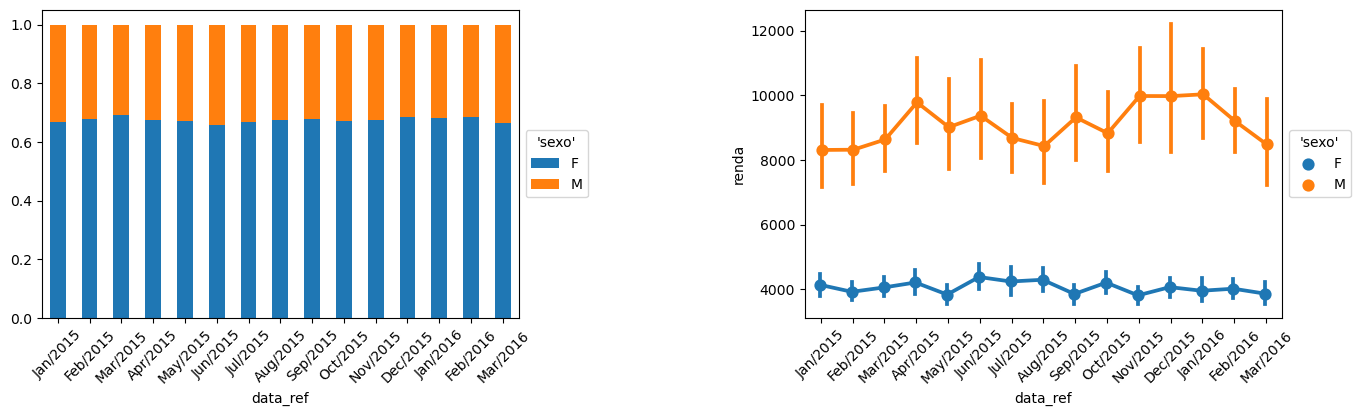

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


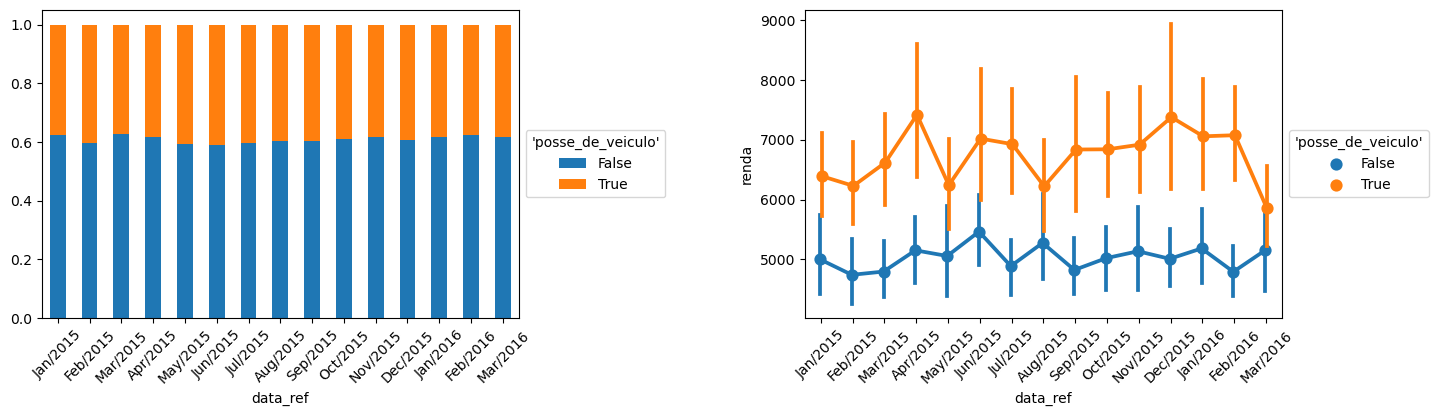

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


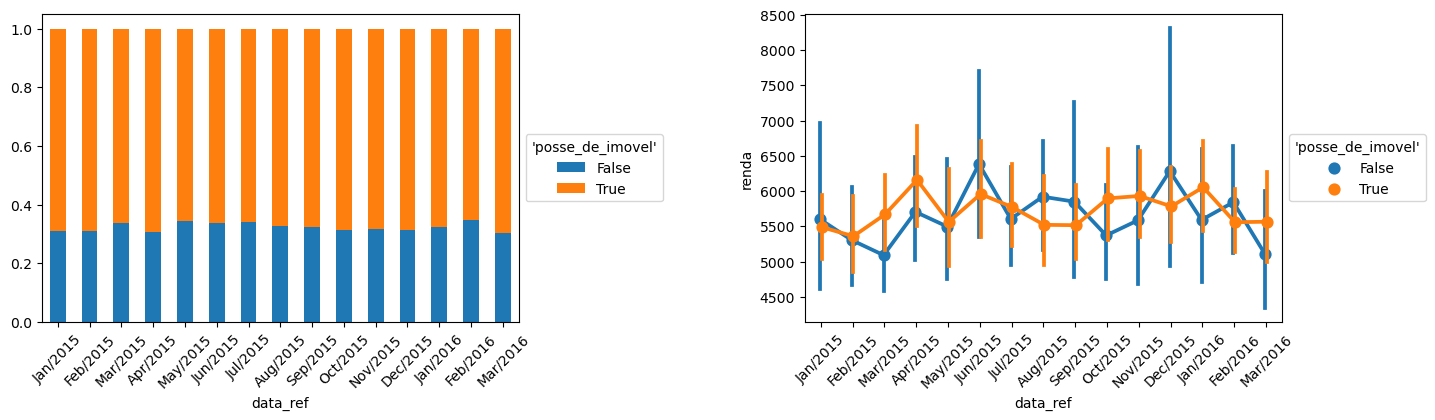

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


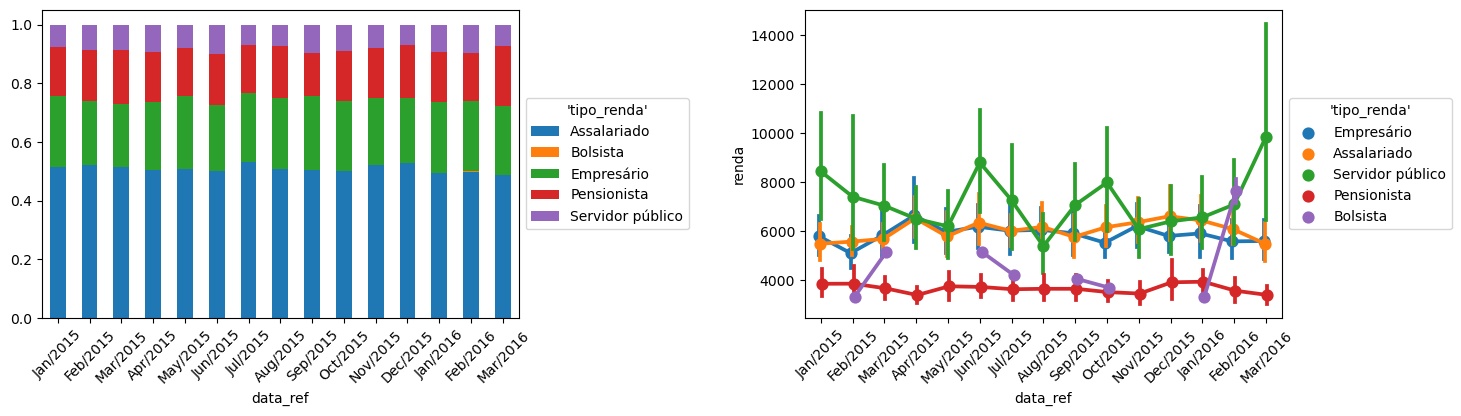

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


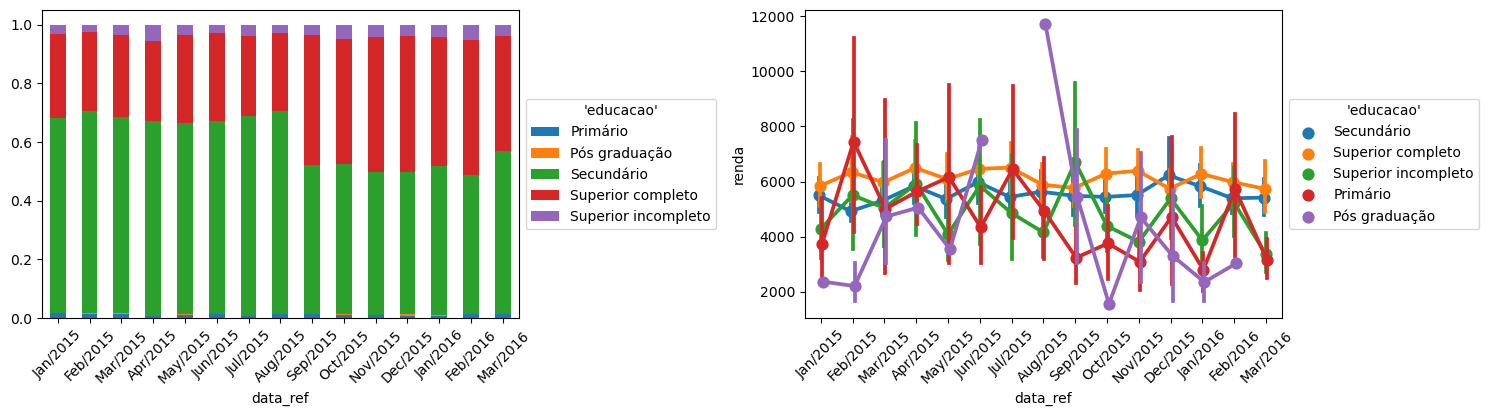

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


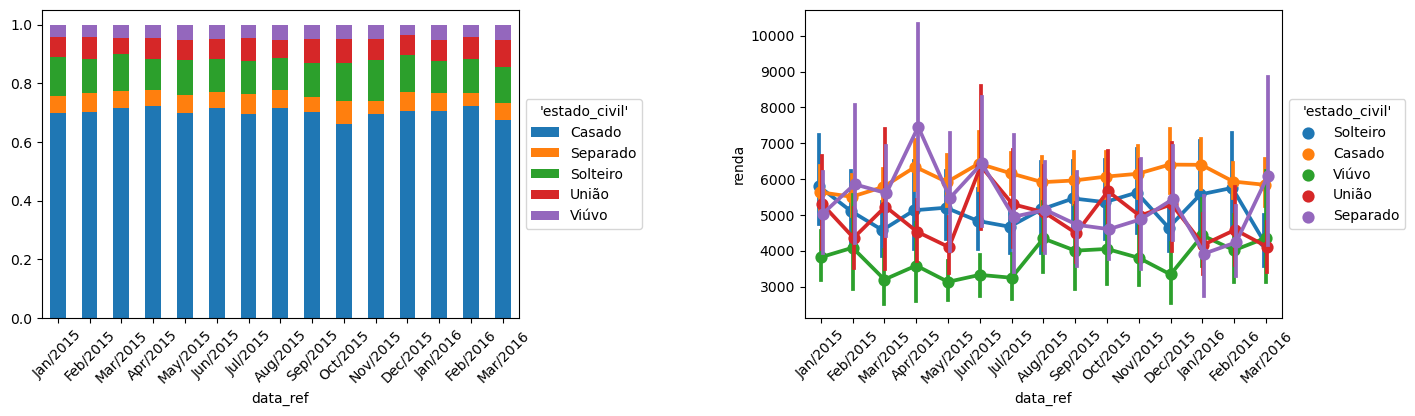

C:\Users\Belit\AppData\Local\Temp\ipykernel_3956\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


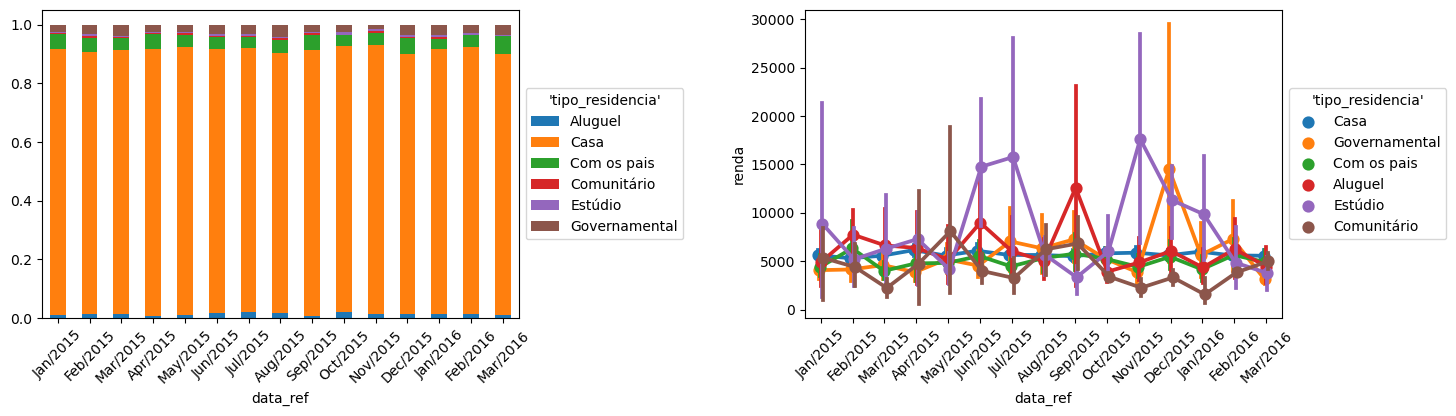

In [14]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:darkgreen">Vamos converter as variáveis categóricas em váriaveis dummies(numéricas), para a construção da nossa árvore de decisão.</span>


In [15]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

,tipos_dados,qtd_valores,qtd_categorias
Unnamed: 0,int64,12427,12427
id_cliente,int64,12427,8161
sexo,object,12427,2
posse_de_veiculo,bool,12427,2
posse_de_imovel,bool,12427,2
qtd_filhos,int64,12427,8
tipo_renda,object,12427,5
educacao,object,12427,5
estado_civil,object,12427,5
tipo_residencia,object,12427,6


In [16]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12427 non-null  int64  
 1   id_cliente                     12427 non-null  int64  
 2   posse_de_veiculo               12427 non-null  bool   
 3   posse_de_imovel                12427 non-null  bool   
 4   qtd_filhos                     12427 non-null  int64  
 5   idade                          12427 non-null  int64  
 6   tempo_emprego                  12427 non-null  float64
 7   qt_pessoas_residencia          12427 non-null  float64
 8   renda                          12427 non-null  float64
 9   sexo_F                         12427 non-null  uint8  
 10  sexo_M                         12427 non-null  uint8  
 11  tipo_renda_Assalariado         12427 non-null  uint8  
 12  tipo_renda_Bolsista            12427 non-null 

In [17]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'lightblue'], align=0)
)

,var,corr
0,renda,1.000000
1,tempo_emprego,0.385013
2,sexo_M,0.265325
3,idade,0.127069
4,posse_de_veiculo,0.083105
5,estado_civil_Casado,0.054248
6,tipo_renda_Servidor público,0.042051
7,tipo_residencia_Estúdio,0.028391
8,educacao_Superior completo,0.018961
9,qt_pessoas_residencia,0.018683


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:darkgreen">A técnica escolhida para esse projeto será a Decision Tree Regressor, por conta da sua capacidade de analisar o comportamento dos dados, e nos levar há uma margem grande de acertos para eventos futuros.</span>


In [18]:
# Divisão da base de treino e da base de teste
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12427, 31)
Quantidade de linhas de y: 12427
X_train: (9320, 31)
X_test: (3107, 31)
y_train: (9320,)
y_test: (3107,)


In [19]:
#Seleção dos parâmetros do modelo
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

,max_depth,min_samples_leaf,score
137,5,18,0.404094
139,5,20,0.402842
138,5,19,0.402842
103,4,14,0.397264
107,4,18,0.397264
...,...,...,...
20,1,21,0.101771
19,1,20,0.101771
18,1,19,0.101771
540,19,1,0.043311


### Rodando o modelo


<span style="color:darkgreen">*Árvore de Decisão*</span>


In [20]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

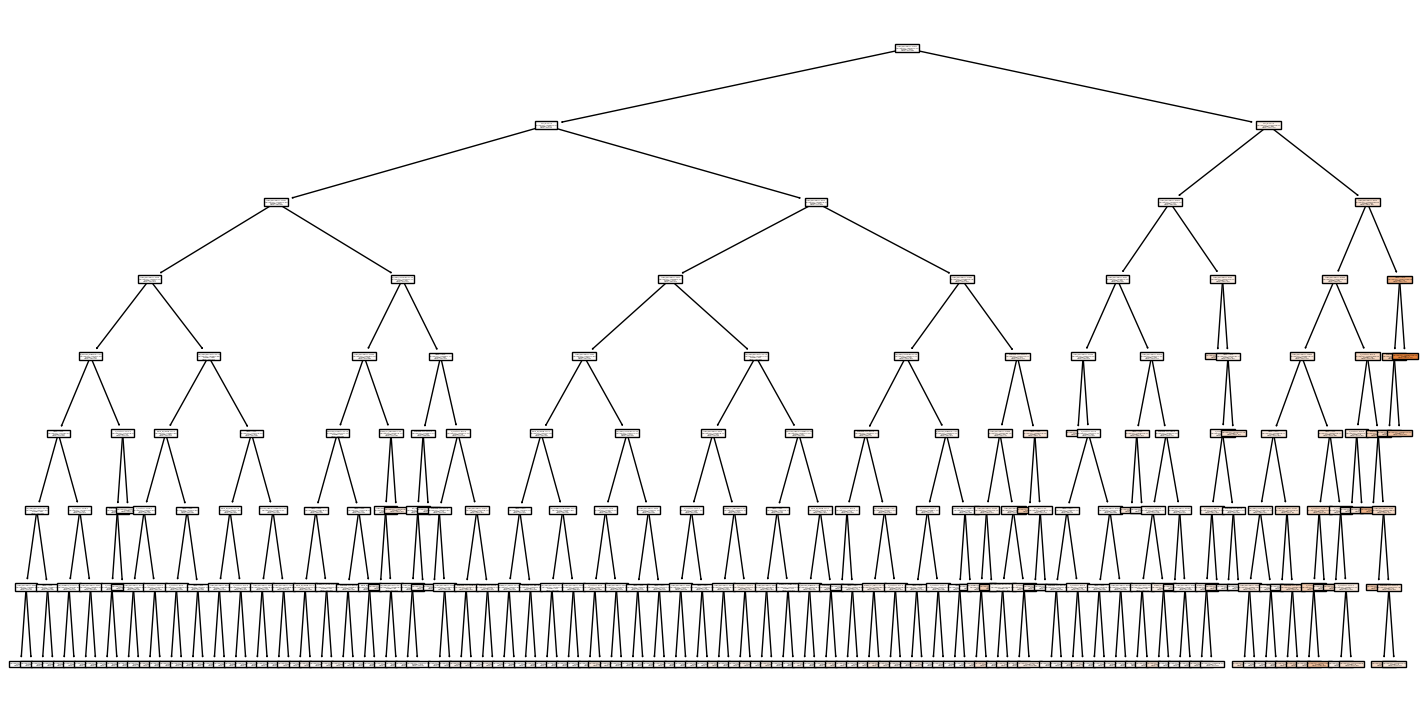

In [21]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns.tolist(), 
                    filled=True)

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [22]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,64
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,35 



In [23]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

,renda,renda_predict
0,8060.34,2281.78
1,1852.15,7949.24
2,2253.89,3127.13
3,6600.77,3296.07
4,6475.97,5425.56
...,...,...
14994,1592.57,12206.59
14995,7990.58,5259.04
14997,604.82,3296.07
14998,3352.27,5735.97


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [24]:
# Simulando a previsão de renda.
entrada = pd.DataFrame([{'sexo': 'M', 
                         'posse_de_veiculo': False, 
                         'posse_de_imovel': True, 
                         'qtd_filhos': 1, 
                         'tipo_renda': 'Assalariado', 
                         'educacao': 'Superior completo', 
                         'estado_civil': 'Solteiro', 
                         'tipo_residencia': 'Casa', 
                         'idade': 34, 
                         'tempo_emprego': None, 
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")


Renda estimada: R$3480,61
